## Decision Tree Practise

## Drug Dataset

In [1]:
import pandas as pd

df = pd.read_csv('datasets/drug.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [2]:
df.shape

(200, 6)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
Age            200 non-null int64
Sex            200 non-null object
BP             200 non-null object
Cholesterol    200 non-null object
Na_to_K        200 non-null float64
Drug           200 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [5]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [6]:
cls_names = df['Drug'].value_counts().index
cls_names

Index(['drugY', 'drugX', 'drugA', 'drugB', 'drugC'], dtype='object')

In [7]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [8]:
from sklearn.preprocessing import LabelEncoder
def lb():
    lbc = LabelEncoder()
    for col in df.columns:
        df[col] = lbc.fit_transform(df[col])
    return
lb()

In [9]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,8,0,0,0,167,4
1,30,1,1,0,89,2
2,30,1,1,0,43,2
3,12,0,2,0,10,3
4,44,0,1,0,133,4


In [10]:
X = df.drop('Drug',axis = 1)
Y = df['Drug']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
Y_pred = tree_clf.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score

confusion_matrix(Y_test,Y_pred)

array([[ 7,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  0, 18,  0],
       [ 0,  0,  0,  0, 26]], dtype=int64)

In [14]:
accuracy_score(Y_test,Y_pred)

0.9

In [15]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf,out_file='diabetes.dot',class_names=cls_names,
                rounded=True,filled=True)

In [16]:
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import os
os.environ["PATH"]+=os.environ['PATH']+';'+r'C:\Users\Jesus\Anaconda3\Lib\site-packages\graphviz-2.38\release\bin'


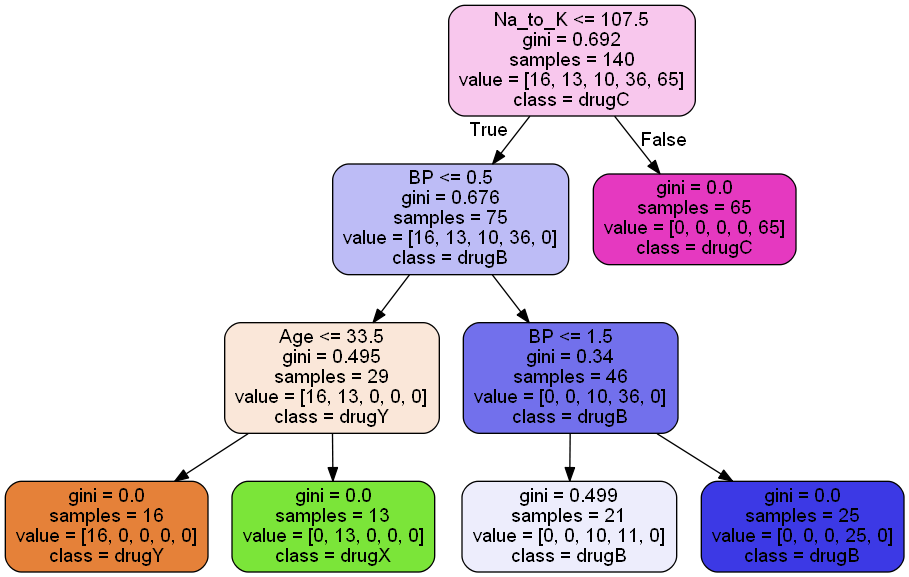

In [17]:
dot_data = StringIO()
export_graphviz(tree_clf,out_file=dot_data,filled=True, rounded=True,feature_names=X_train.columns,
                class_names = cls_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Random Forest Classifier

# [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
## Predict the onset of diabetes based on diagnostic measures

## Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## About this dataset
The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

|Features|Description|
|--|--|
|Pregnancies|Number of times pregnant|
|Glucose|Plasma glucose concentration a<br> 2 hours in an oral glucose tolerance test|
|BloodPressure|Diastolic blood pressure (mm Hg)|
|SkinThickness|Triceps skin fold thickness (mm)|
|Insulin|2-Hour serum insulin (mu U/ml)|
|BMI|Body mass index **(weight in kg/(height in m)^2)**|
|Diabetes|PedigreeFunctionDiabetes pedigree function|
|Age|Age (years)|
|Outcome|Class variable (0 or 1)<br> 268 of 768 are 1, the others are 0|

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



df = pd.read_csv('datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
df.shape

(768, 9)

In [21]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


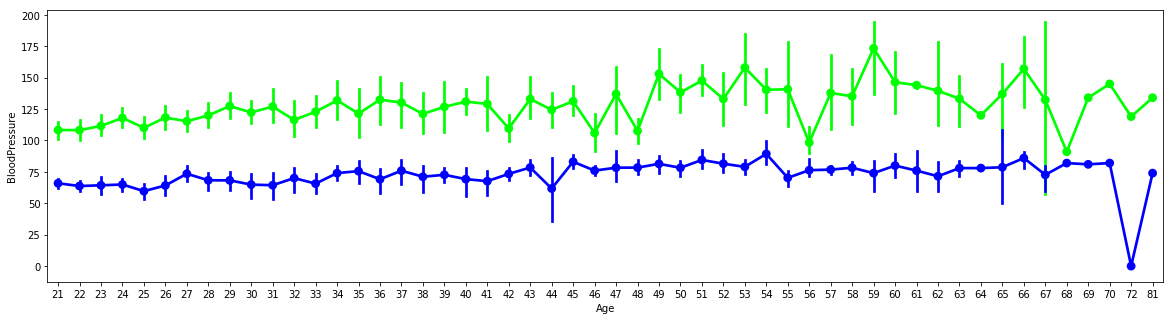

In [23]:
plt.figure(figsize=(20,5))
sns.pointplot(x='Age',y='Glucose',data=df,color='lime',alpha=0.8)
sns.pointplot(x='Age',y='BloodPressure',data=df,color='blue',alpha=0.8)

In [24]:
X = df.drop('Outcome',axis = 1)
Y = df['Outcome']

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42)

In [26]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
Y_pred = rfc.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test,Y_pred)

0.7402597402597403